In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy

output_data_file = 'output_data/cities.csv'

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
weather_api_key

'c8554ba1fbb753fb6092c34c874f029b'

In [3]:
lat_lngs = []
cities = []

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

683

In [31]:
cities['natal'].index

TypeError: list indices must be integers or slices, not str

In [28]:
#list(lat_lngs)
base_url = f"http://api.openweathermap.org/data/2.5/weather"
base_url

'http://api.openweathermap.org/data/2.5/weather'

In [112]:
city_weather_list[0]

{'coord': {'lon': -35.21, 'lat': -5.79},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 86.94,
  'feels_like': 88.18,
  'temp_min': 86,
  'temp_max': 87.8,
  'pressure': 1013,
  'humidity': 55},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 110},
 'clouds': {'all': 20},
 'dt': 1592239662,
 'sys': {'type': 1,
  'id': 8417,
  'country': 'BR',
  'sunrise': 1592209671,
  'sunset': 1592252105},
 'timezone': -10800,
 'id': 3394023,
 'name': 'Natal',
 'cod': 200}

In [114]:
city_weather_list[0]['cod']

IndexError: list index out of range

In [116]:
city_weather_list = []
for city in cities:
    params = {'q': city, 'appid': weather_api_key, 'units': 'imperial'}
    response = requests.get(base_url, params=params).json()
    if response['cod'] == 200:
        print(f"Processing City {cities.index(city)+1} | {city}")
        city_weather_list.append(response)
    else:
        print(f"City not found. Skipping...")
    time.sleep(1.2)

Processing City 1 | natal
Processing City 2 | hilo
Processing City 3 | bluff
Processing City 4 | salalah
Processing City 5 | mataura
Processing City 6 | cape town
Processing City 7 | romilly-sur-seine
Processing City 8 | yar-sale
City not found. Skipping...
Processing City 10 | kajaani
Processing City 11 | albany
Processing City 12 | labuhan
Processing City 13 | mizdah
Processing City 14 | saskylakh
Processing City 15 | airai
Processing City 16 | huarmey
Processing City 17 | caravelas
Processing City 18 | kodiak
Processing City 19 | nagato
Processing City 20 | thompson
Processing City 21 | udachnyy
Processing City 22 | port moresby
Processing City 23 | mar del plata
Processing City 24 | buchanan
Processing City 25 | vardo
Processing City 26 | rikitea
Processing City 27 | kavaratti
Processing City 28 | sadon
Processing City 29 | pemberton
Processing City 30 | puerto ayora
Processing City 31 | mahebourg
Processing City 32 | anchorage
Processing City 33 | carnarvon
Processing City 34 | kh

In [119]:
city_weather_list[0]

{'coord': {'lon': -35.21, 'lat': -5.79},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 86.9,
  'feels_like': 89.92,
  'temp_min': 86,
  'temp_max': 87.8,
  'pressure': 1012,
  'humidity': 62},
 'visibility': 10000,
 'wind': {'speed': 10.29, 'deg': 150},
 'clouds': {'all': 40},
 'dt': 1592242354,
 'sys': {'type': 1,
  'id': 8452,
  'country': 'BR',
  'sunrise': 1592209671,
  'sunset': 1592252105},
 'timezone': -10800,
 'id': 3394023,
 'name': 'Natal',
 'cod': 200}

In [123]:
city = [city_weather_list[i]['name'] for i in range(len(city_weather_list))]
cloudiness = [city_weather_list[i]['clouds']['all'] for i in range(len(city_weather_list))]
country = [city_weather_list[i]['sys']['country'] for i in range(len(city_weather_list))]
date = [city_weather_list[i]['dt'] for i in range(len(city_weather_list))]
humidity = [city_weather_list[i]['main']['humidity'] for i in range(len(city_weather_list))]
lat = [city_weather_list[i]['coord']['lat'] for i in range(len(city_weather_list))]
lng = [city_weather_list[i]['coord']['lon'] for i in range(len(city_weather_list))]
max_temp = [city_weather_list[i]['main']['temp_max'] for i in range(len(city_weather_list))]
wind_speed = [city_weather_list[i]['wind']['speed'] for i in range(len(city_weather_list))]


In [124]:
weather_df = pd.DataFrame({'City': city,
                         'Cloudiness': cloudiness,
                         'Country': country,
                         'Date': date,
                         'Humidity': humidity,
                         'Lat': lat,
                         'Lng': lng,
                         'Max Temp': max_temp,
                         'Wind Speed': wind_speed})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Natal,40,BR,1592242354,62,-5.79,-35.21,87.80,10.29
1,Hilo,1,US,1592242585,83,19.73,-155.09,72.00,3.36
2,Bluff,32,NZ,1592242586,90,-46.60,168.33,49.01,9.84
3,Salalah,40,OM,1592242343,94,17.02,54.09,84.20,6.93
4,Mataura,5,NZ,1592242589,90,-46.19,168.86,43.27,3.89


In [134]:
weather_df.to_csv(output_data_file)

In [128]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        631 non-null    object 
 1   Cloudiness  631 non-null    int64  
 2   Country     631 non-null    object 
 3   Date        631 non-null    int64  
 4   Humidity    631 non-null    int64  
 5   Lat         631 non-null    float64
 6   Lng         631 non-null    float64
 7   Max Temp    631 non-null    float64
 8   Wind Speed  631 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 44.5+ KB


In [166]:
weather_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,631.000000,6.310000e+02,631.000000,631.000000,631.000000,631.000000,631.000000
mean,49.648177,1.592243e+09,67.245642,19.887575,17.970856,68.752235,8.475341
std,36.773867,2.858470e+02,21.933627,32.988879,89.195284,14.743436,5.505501
min,0.000000,1.592242e+09,6.000000,-54.800000,-175.200000,29.230000,0.540000
25%,13.000000,1.592243e+09,54.000000,-8.065000,-58.895000,57.200000,4.430000
50%,49.000000,1.592243e+09,72.000000,24.690000,23.620000,70.000000,7.270000
75%,85.500000,1.592243e+09,84.000000,47.645000,96.250000,79.180000,11.410000
max,100.000000,1.592244e+09,100.000000,78.220000,177.480000,112.050000,34.450000


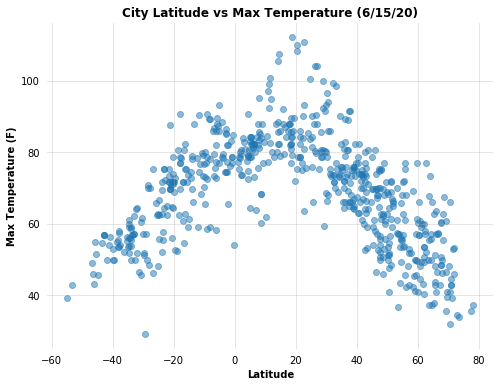

In [159]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(weather_df['Lat'], weather_df['Max Temp'], alpha=0.5)
ax.set_title('City Latitude vs Max Temperature (6/15/20)', fontweight='bold')
ax.set_ylabel('Max Temperature (F)', fontweight='bold')
ax.set_xlabel('Latitude', fontweight='bold')
ax.grid(True, alpha=0.4)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)

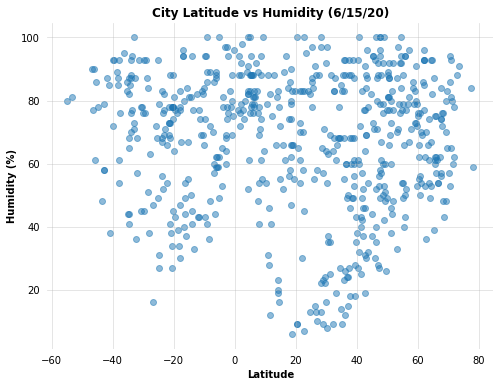

In [163]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(weather_df['Lat'], weather_df['Humidity'], alpha=0.5)
ax.set_title('City Latitude vs Humidity (6/15/20)', fontweight='bold')
ax.set_ylabel('Humidity (%)', fontweight='bold')
ax.set_xlabel('Latitude', fontweight='bold')
ax.grid(True, alpha=0.4)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)

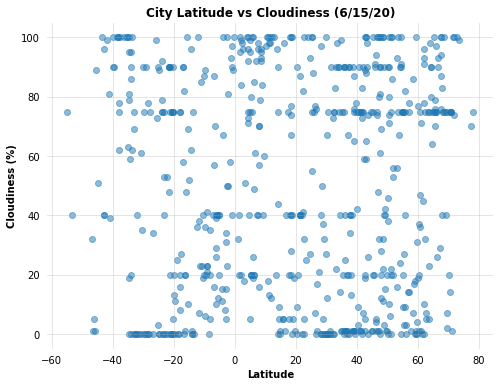

In [164]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(weather_df['Lat'], weather_df['Cloudiness'], alpha=0.5)
ax.set_title('City Latitude vs Cloudiness (6/15/20)', fontweight='bold')
ax.set_ylabel('Cloudiness (%)', fontweight='bold')
ax.set_xlabel('Latitude', fontweight='bold')
ax.grid(True, alpha=0.4)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)

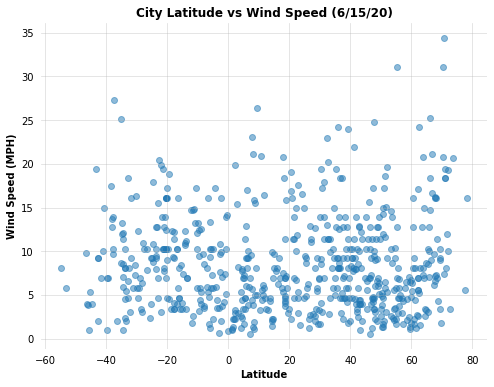

In [165]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(weather_df['Lat'], weather_df['Wind Speed'], alpha=0.5)
ax.set_title('City Latitude vs Wind Speed (6/15/20)', fontweight='bold')
ax.set_ylabel('Wind Speed (MPH)', fontweight='bold')
ax.set_xlabel('Latitude', fontweight='bold')
ax.grid(True, alpha=0.4)
ax.set_frame_on(False)
ax.tick_params(bottom=False, left=False)

In [167]:
northern_hemisphere_df = weather_df.loc[weather_df['Lat'] >= 0]
southern_hemisphere_df = weather_df.loc[weather_df['Lat'] < 0]

In [224]:
southern_hemisphere_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Natal,40,BR,1592242354,62,-5.79,-35.21,87.80,10.29
2,Bluff,32,NZ,1592242586,90,-46.60,168.33,49.01,9.84
4,Mataura,5,NZ,1592242589,90,-46.19,168.86,43.27,3.89
5,Cape Town,0,ZA,1592242618,76,-33.93,18.42,59.00,10.29
10,Labuhan,57,ID,1592242658,86,-6.88,112.21,79.61,5.93


In [222]:
northern_hemisphere_df.loc[0]['Lat']

KeyError: 0

In [249]:
def linreg_lat(df, y):
    regression = linregress(df['Lat'], df[y])
    print(f"Correlation is {regression.rvalue}")
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter(df['Lat'], df[y], alpha=0.5)
    ax.plot(df['Lat'], regression.slope*df['Lat']+regression.intercept, 'r')
    ax.set_xlabel('Latitude', fontweight='bold')
    ax.set_frame_on(False)
    ax.grid(True, alpha=0.4)
    #ax.text(f"{regression.slope}x+{regression.intercept}")
    if df['Lat'].min() >=0:
        if y == 'Max Temp':
            ax.set_title('City Latitude vs. Max Temperature for Northern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Max Temperature (F)', fontweight='bold')
            ax.text(50,100, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
        elif y == 'Humidity':
            ax.set_title('City Latitude vs. Humidity for Northern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Humidity (%)', fontweight='bold')
            ax.text(55,20, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
        elif y == 'Cloudiness':
            ax.set_title('City Latitude vs. Cloudiness for Northern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Cloudiness (%)', fontweight='bold')
            ax.text(60,40, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
        elif y == 'Wind Speed':
            ax.set_title('City Latitude vs. Wind Speed for Northern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Wind Speed (MPH)', fontweight='bold')
            ax.text(15,32, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
    else:
        if y == 'Max Temp':
            ax.set_title('City Latitude vs. Max Temperature for Southern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Max Temperature (F)', fontweight='bold')
            ax.text(-50,85, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
        elif y == 'Humidity':
            ax.set_title('City Latitude vs. Humidity for Southern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Humidity (%)', fontweight='bold')
            ax.text(-50,25, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
        elif y == 'Cloudiness':
            ax.set_title('City Latitude vs. Cloudiness for Southern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Cloudiness (%)', fontweight='bold')
            ax.text(-50,20, f"y={round(regression.slope,2)}x+{round(regression.intercept,2)}", fontsize=14, fontweight='bold')
        elif y == 'Wind Speed':
            ax.set_title('City Latitude vs. Wind Speed for Southern Hemisphere (6/15/20)', fontweight='bold')
            ax.set_ylabel('Wind Speed (MPH)', fontweight='bold')

Correlation is -0.7556881824785704


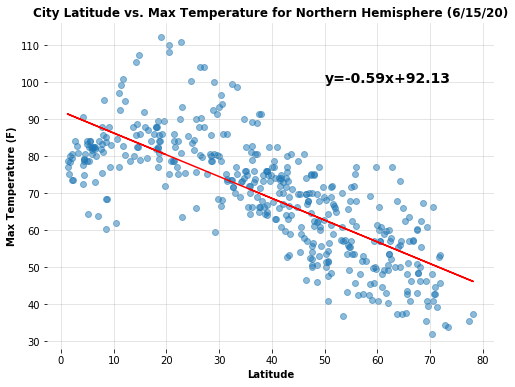

In [250]:
linreg_lat(northern_hemisphere_df, 'Max Temp')

Correlation is 0.7736172256220857


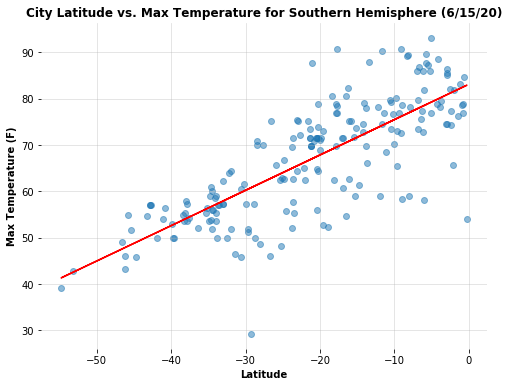

In [248]:
linreg_lat(southern_hemisphere_df, 'Max Temp')

Correlation is 0.004229581165243768


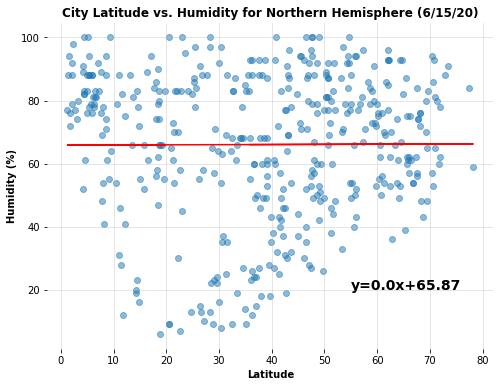

In [251]:
linreg_lat(northern_hemisphere_df, 'Humidity')

Correlation is -0.05144040374448854


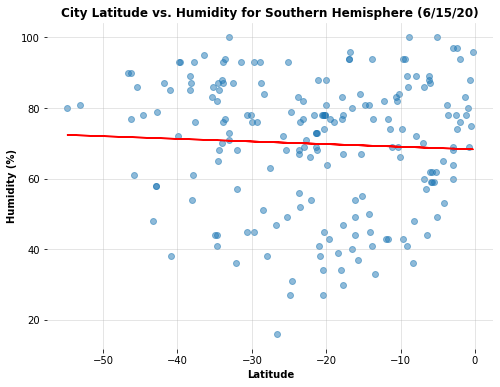

In [231]:
linreg_lat(southern_hemisphere_df, 'Humidity')

Correlation is -0.000727135089602412


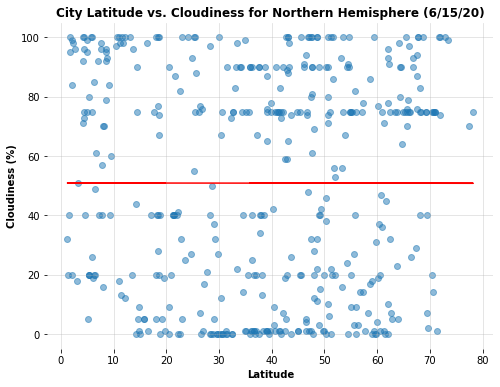

In [232]:
linreg_lat(northern_hemisphere_df, 'Cloudiness')

Correlation is -0.16454668349004534


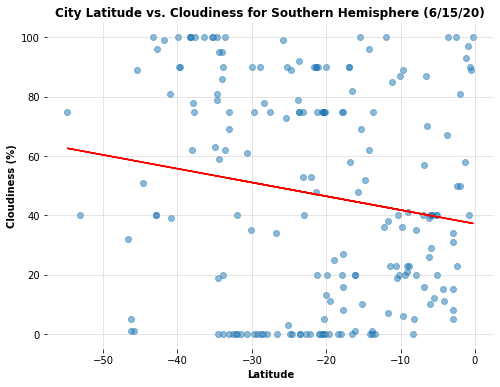

In [233]:
linreg_lat(southern_hemisphere_df, 'Cloudiness')

Correlation is 0.1276482762722394


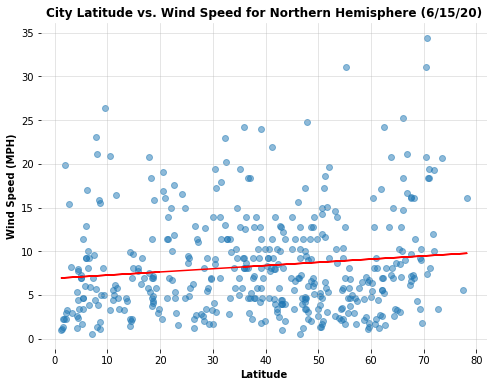

In [234]:
linreg_lat(northern_hemisphere_df, 'Wind Speed')

Correlation is -0.07000686942766256


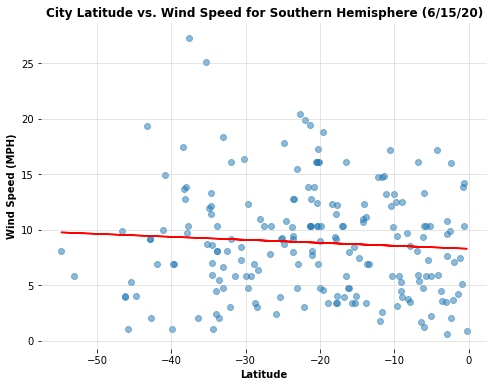

In [236]:
linreg_lat(southern_hemisphere_df, 'Wind Speed')